# Principal Component Analysis

In [42]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [43]:
# load dataset
df = pd.read_csv('../Dataset/digits_data.csv')

In [44]:
# display the first few rows of the dataframe
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# shape of data
df.shape

(42000, 785)

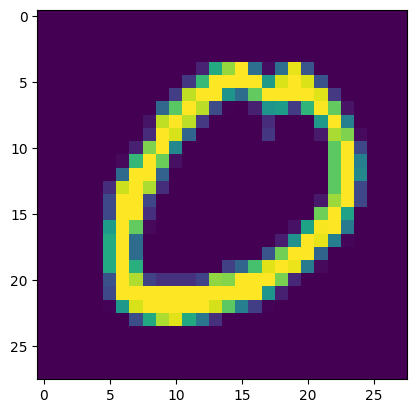

In [46]:
# Show the 13051st image from the dataset
plt.imshow(df.iloc[13051,1:].values.reshape(28,28))

In [47]:
# Select all rows and columns from 1 onward as features (X)
X = df.iloc[:, 1:]

# Select the first column as labels (y)
y = df.iloc[:, 0]


In [48]:
# train test split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Show the number of rows and columns in X_train
X_train.shape

(33600, 784)

In [50]:
# Import the K-Nearest Neighbors (KNN) classifier from scikit-learn
from sklearn.neighbors import KNeighborsClassifier


In [51]:
# Create a K-Nearest Neighbors (KNN) model
knn = KNeighborsClassifier()

# Train the KNN model using the training data
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [52]:
# Import the time module to measure how long prediction takes
import time

# Record the start time
start = time.time()

# Predict the labels for the test data
y_pred = knn.predict(X_test)

# Print the total time taken for prediction
print(time.time() - start)


15.472930908203125


In [78]:
# Import the function to calculate accuracy
from sklearn.metrics import accuracy_score

# Calculate and show the accuracy of the model
accuracy_score(y_test, y_pred)

0.9507142857142857

In [79]:
# Import the StandardScaler to normalize or scale the data
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

In [80]:
# Fit the scaler on the training data and transform it (normalize training data)
X_train = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data
X_test = scaler.transform(X_test)

# Using PCA

In [81]:
# Import the PCA class for dimensionality reduction
from sklearn.decomposition import PCA

# Create a PCA object to keep 200 principal components
pca = PCA(n_components=200)


In [83]:
# Fit PCA on the training data and transform it (reduce dimensions)
X_train_trf = pca.fit_transform(X_train)

# Apply the same PCA transformation to the test data
X_test_trf = pca.transform(X_test)



In [84]:
# Show the number of rows and columns after applying PCA on training data
X_train_trf.shape

(33600, 200)

In [85]:
# Create a new K-Nearest Neighbors (KNN) model
knn = KNeighborsClassifier()

In [86]:
# Train the KNN model using the PCA-transformed training data
knn.fit(X_train_trf, y_train)

KNeighborsClassifier()

In [87]:
# Predict the labels for the PCA-transformed test data
y_pred = knn.predict(X_test_trf)

In [88]:
# Print the accuracy of the KNN model after applying PCA
print(accuracy_score(y_test, y_pred))

0.9507142857142857


###  Test different numbers of PCA components (from 1 to 784)

In [ ]:
# for i in range(1,785):
#     pca = PCA(n_components=i)
    
#     X_train_trf = pca.fit_transform(X_train)
#     X_test_trf = pca.transform(X_test)

#     knn = KNeighborsClassifier()

#     knn.fit(X_train_trf, y_train)

#     y_pred = knn.predict(X_test_trf)

#     print(accuracy_score(y_test, y_pred))

# Transforming to a 2D coordinate system


In [91]:
# Create a PCA object to reduce data to 2 components (for 2D visualization)
pca = PCA(n_components=2)

# Fit PCA on the training data and transform it
X_train_trf = pca.fit_transform(X_train)

# Apply the same PCA transformation to the test data
X_test_trf = pca.transform(X_test)

In [92]:
# Show the PCA-transformed training data (now has 2 columns/features)
X_train_trf

array([[-2.71863253, -0.48982409],
       [-0.67698015, -6.75362491],
       [-3.03323281,  6.50981624],
       ...,
       [ 2.14883643,  0.78079444],
       [ 1.05957006,  0.94767312],
       [17.70258446,  1.96188185]])

In [93]:
# Import Plotly Express for creating interactive plots
import plotly.express as px

# Convert training labels to strings for coloring the plot
y_train_trf = y_train.astype(str)

# Create a 2D scatter plot of the PCA-transformed training data
fig = px.scatter(
    x = X_train_trf[:, 0],          # First PCA component on the X-axis
    y = X_train_trf[:, 1],          # Second PCA component on the Y-axis
    color = y_train_trf,            # Color points based on their class labels
    color_discrete_sequence = px.colors.qualitative.G10  # Use a nice color palette
)

# Display the interactive scatter plot
fig.show()

# Transforming in 3D

In [94]:
# Create a PCA object to reduce data to 3 components (for 3D visualization)
pca = PCA(n_components=3)

# Fit PCA on the training data and transform it
X_train_trf = pca.fit_transform(X_train)

# Apply the same PCA transformation to the test data
X_test_trf = pca.transform(X_test)

In [95]:
# Show the PCA-transformed training data (now has 3 columns/features)
X_train_trf

array([[-2.71863253, -0.48982409,  1.1354966 ],
       [-0.67698015, -6.75362491, -2.33590139],
       [-3.03323281,  6.50981624,  7.49182983],
       ...,
       [ 2.14883643,  0.78079444, -0.74738774],
       [ 1.05957006,  0.94767312,  3.94973114],
       [17.70258446,  1.96188185, -4.94352837]])

In [96]:
# Convert training labels to strings for coloring the 3D plot
y_train_trf = y_train.astype(str)

# Create a 3D scatter plot of the PCA-transformed training data
fig = px.scatter_3d(
    x = X_train_trf[:, 0],   # First PCA component on the X-axis
    y = X_train_trf[:, 1],   # Second PCA component on the Y-axis
    z = X_train_trf[:, 2],   # Third PCA component on the Z-axis
    color = y_train_trf      # Color points based on their class labels
)

# Adjust plot margins for better spacing
fig.update_layout(
    margin = dict(l=20, r=20, t=20, b=20)
)

# Display the interactive 3D scatter plot
fig.show()

In [70]:
# Eigen values
pca.explained_variance_

array([40.67111198, 29.17023401, 26.74459621])

In [71]:
# Eigen vector
pca.components_.shape

(3, 784)

In [97]:
# Show how much percentage of total variance each PCA component explains
pca.explained_variance_ratio_ * 100

array([5.78519225, 4.14926968, 3.80423901])

In [98]:
# Create a PCA object without limiting the number of components (keep all)
pca = PCA(n_components=None)

# Fit PCA on the training data and transform it
X_train_trf = pca.fit_transform(X_train)

# Apply the same PCA transformation to the test data
X_test_trf = pca.transform(X_test)

In [99]:
# Show the number of principal components (same as number of original features)
pca.explained_variance_.shape

(784,)

In [100]:
# Show the shape of the PCA components matrix
# (rows = number of principal components, columns = number of original features)
pca.components_.shape

(784, 784)

In [101]:
# Show the cumulative sum of explained variance ratios
# (tells how much total variance is explained as we add more components)
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

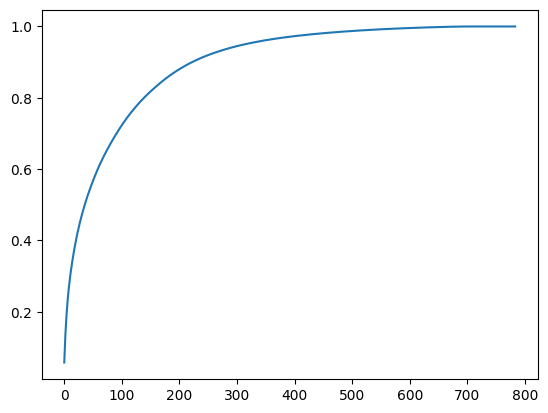

In [102]:
# Plot the cumulative explained variance to see how many components
# are needed to capture most of the total variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))